# Part 2

Data Set Characteristics: Multivariate
• Attribute Characteristics: Categorical (name+sername), Integer(df_f), Real()
• Number of Attributes: at least 2 integers/real
• Missing Values? YES!

+ Survived
0 = Dead 1 = Alive

+ Pclass
1 = First class 2 = Second class 3 = Third class

+ SibSp
Number of siblings

+ Parch
No. of parents / children aboard the Titanic

+ Fare
Passenger fare

+ Port of embarkation 
C = Cherbourg, Q = Queenstown, S = Southampton

In [404]:

import os
from os import walk
import urllib.request
from pathlib import Path
from datetime import datetime

import pandas as pd
import numpy as np
import re


from io import StringIO
import glob

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr


### Reading

In [313]:
file_path = './datasets/Titanic-Dataset.csv'

In [314]:
def readind_text_pandas(file_path):
    df = pd.read_csv(file_path, sep=',', header=0, index_col="PassengerId", low_memory=False)
    return df

In [412]:
def readind_text_num(file_path):

    new_file = "./datasets/titanic_set.csv"

    if glob.glob(os.path.join(new_file)):
        print("File with cleaned data exist: ")
        data = np.genfromtxt(new_file, delimiter=",", dtype=None, encoding="utf-8", names=True)
        return data

    with open(file_path, "r", encoding="utf-8") as infile, open(new_file, "w", encoding="utf-8") as outfile:
        
        for line in infile:

            line = re.sub(r'\"(.*?)\"', lambda x: x.group(0).replace(",", ";"), line)
            outfile.write(line)

    data = np.genfromtxt(new_file, delimiter=",", dtype=None, encoding="utf-8", names=True)
    return data


In [441]:
df = readind_text_pandas(file_path)

df_n = readind_text_num(file_path)

df_n

File with cleaned data exist: 


array([(  1, 0, 3, '"Braund; Mr. Owen Harris"', 'male', 22.  , 1, 0, 'A/5 21171',   7.25  , '', 'S'),
       (  2, 1, 1, '"Cumings; Mrs. John Bradley (Florence Briggs Thayer)"', 'female', 38.  , 1, 0, 'PC 17599',  71.2833, 'C85', 'C'),
       (  3, 1, 3, '"Heikkinen; Miss. Laina"', 'female', 26.  , 0, 0, 'STON/O2. 3101282',   7.925 , '', 'S'),
       (  4, 1, 1, '"Futrelle; Mrs. Jacques Heath (Lily May Peel)"', 'female', 35.  , 1, 0, '113803',  53.1   , 'C123', 'S'),
       (  5, 0, 3, '"Allen; Mr. William Henry"', 'male', 35.  , 0, 0, '373450',   8.05  , '', 'S'),
       (  6, 0, 3, '"Moran; Mr. James"', 'male',   nan, 0, 0, '330877',   8.4583, '', 'Q'),
       (  7, 0, 1, '"McCarthy; Mr. Timothy J"', 'male', 54.  , 0, 0, '17463',  51.8625, 'E46', 'S'),
       (  8, 0, 3, '"Palsson; Master. Gosta Leonard"', 'male',  2.  , 3, 1, '349909',  21.075 , '', 'S'),
       (  9, 1, 3, '"Johnson; Mrs. Oscar W (Elisabeth Vilhelmina Berg)"', 'female', 27.  , 0, 2, '347742',  11.1333, '', 'S'),
  

### Dealing with missing data

In [316]:
df.isnull().sum()
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [456]:
print( np.where(np.isnan(df_n['Age']))[0].size)

print( len(np.where( (df_n['Cabin'] == '') | (df_n['Cabin'] == None))[0]))

print( len(np.where( (df_n['Embarked'] == '') | (df_n['Embarked'] == None))[0]))



177
687
2


In [462]:
df_n['Age'][np.isnan(df_n['Age'])] = np.nanmean(df_n['Age'])

df_n['Cabin'][(df_n['Cabin'] == '') | (df_n['Cabin'] == np.array(None, dtype='<U1'))] = 'A00'
df_n['Embarked'][(df_n['Embarked'] == '') | (df_n['Embarked'] == np.array(None, dtype='<U1'))] = 'C'

df_n['Fare'] = np.where(df_n['Fare'] == 0, df_n['Fare'].mean(), df_n['Fare'])




In [440]:
np.where(np.isnan(df_n['Age']))[0]
missing_mask = (df_n['Embarked'] == '') | (df_n['Embarked'] == None)

# Вывод индексов строк с пропущенными данными
missing_indices = np.where(missing_mask)[0]
print(missing_indices)

[]


In [438]:
df['Age'] = df['Age'].interpolate(method ='linear', limit_direction ='forward') 

df['Cabin'] = df['Cabin'].fillna('A00')
df['Embarked'] = df['Embarked'].fillna('C')

mean_value = df['Fare'].mean()
print(mean_value)
df['Fare'] = df['Fare'].replace(0, mean_value)

32.204207968574636


In [318]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<Axes: xlabel='PassengerId'>

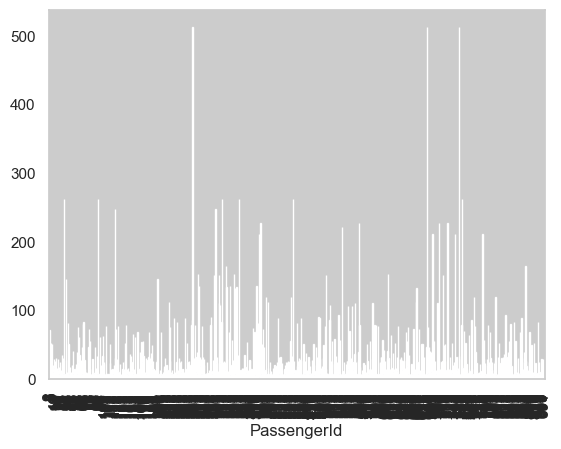

In [319]:
df['Fare'].plot(kind = 'bar')

In [320]:
df_sorted = df[["Fare"]].sort_values(by="Fare", ascending=True).reset_index(drop=True)
df_sorted

,Fare
0,4.0125
1,5.0000
2,6.2375
3,6.4375
4,6.4500
...,...
886,263.0000
887,263.0000
888,512.3292
889,512.3292


### Normalize or standardize the selected dataset

#### Data Normalization with Pandas

Xnormalized​ = (X​−Xmin​)/(Xmax−Xmin)​​
- X is the original value of the feature.
- Xmin​ is the minimum value of the feature in the dataset.
- Xmax​ is the maximum value of the feature in the dataset.
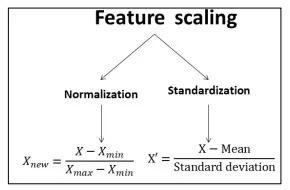

In [485]:
def normalize():
    columns = ["Age", "Fare", "Pclass","Parch", "SibSp", "Survived"]
    df_1 = df[["Age", "Fare", "Survived", "Pclass","Parch", "SibSp"]].copy()
    df_2_1 = df[["Age", "Fare", "Survived", "Pclass","Parch", "SibSp"]].copy()

    for column in columns: 
        df_2_1[column] = (df_2_1[column] - df_2_1[column].min()) / (df_2_1[column].max() - df_2_1[column].min())     

    before = df_1 #.groupby("Survived")[columns].mean()
    after = df_2_1 #.groupby("Survived")[columns].mean()

    
    # fig, axs = plt.subplots(2, 2, figsize=(14, 6))

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    before[columns].plot(kind="hist", bins=10, alpha=0.5, ax=axs[0], title="Without Normalization", legend=True)
    axs[0].set_title("Before Normalization")
    axs[0].set_xlabel("values")
    axs[0].legend()

    after[columns].plot(kind="hist", bins=10, alpha=0.5, ax=axs[1], title="With Normalization", legend=True)

    axs[1].set_title("After Normalization")
    axs[1].set_xlabel("values")
    axs[1].legend()

    bin = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80]

    df['Age'].plot(kind="hist", bins=bin, alpha=0.7, color="turquoise", ax=axs[2], edgecolor="crimson")
    axs[2].set_title("Age from df")
    axs[2].set_xlabel("Age")

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    # axs[0].set_xlabel("0 - did not survive; 1 - survived", fontsize=12)
    # axs[0].legend(["Age", "Fare"], fontsize=10)
    # axs[0].grid(axis="y", linestyle="--")

    # after.plot(kind="bar", ax=axs[1])

    # axs[1].set_xlabel("0 - did not survive; 1 - survived", fontsize=12)
    # axs[1].legend(["Age", "Fare"], fontsize=10)
    # axs[1].grid(axis="y", linestyle="--")

    # plt.tight_layout()
    # plt.show()
    print(after.min())
    return after

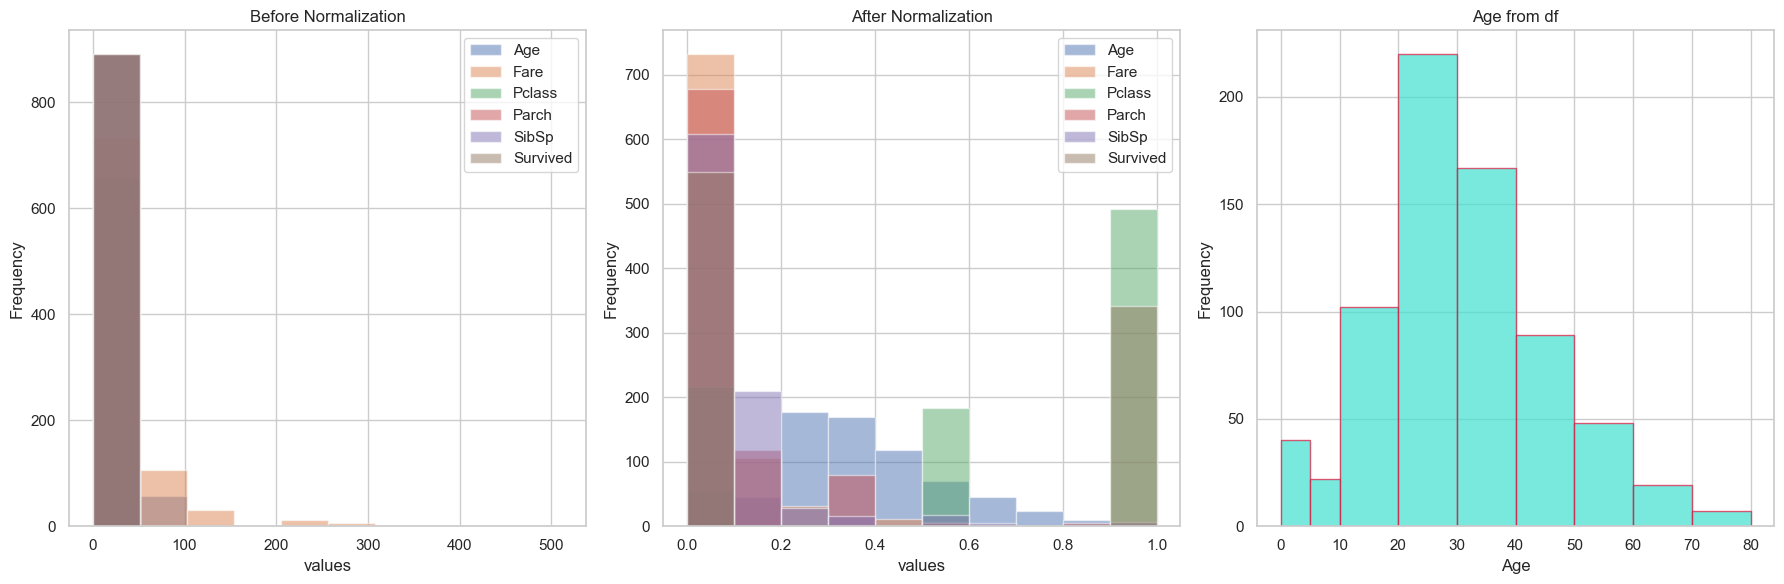

Age         0.0
Fare        0.0
Survived    0.0
Pclass      0.0
Parch       0.0
SibSp       0.0
dtype: float64


Age         1.0
Fare        1.0
Survived    1.0
Pclass      1.0
Parch       1.0
SibSp       1.0
dtype: float64

In [487]:
df_f = normalize()
df_f.max()
# df.max()

In [488]:
def normalize_n():
    columns = ["Age", "Fare", "Pclass", "Parch", "SibSp", "Survived"]
    
    age = df_n["Age"]
    fare = df_n["Fare"]
    pclass = df_n["Pclass"]
    parch = df_n["Parch"]
    sibsp = df_n["SibSp"]
    survived = df_n["Survived"]
    
    df_1 = np.column_stack((age, fare, survived, pclass, parch, sibsp))
    
    df_2_1 = df_1.copy()
    
    for i in range(df_2_1.shape[1]):
        df_2_1[:, i] = (df_2_1[:, i] - np.min(df_2_1[:, i])) / (np.max(df_2_1[:, i]) - np.min(df_2_1[:, i]))
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, column in enumerate(columns):
        axs[0].hist(df_1[:, i], bins=10, alpha=0.5, label=column)
        axs[1].hist(df_2_1[:, i], bins=10, alpha=0.5, label=column)

    axs[0].set_title("Without mormalization")
    axs[0].set_xlabel("Values")
    axs[0].legend()

    axs[1].set_title("With normalization")
    axs[1].set_xlabel("Values")
    axs[1].legend()
    
    bin = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80]

    axs[2].hist(df['Age'], bins=bin, alpha=0.7, color="turquoise", edgecolor="crimson")
    axs[2].set_title("Age from strucrur array")
    axs[2].set_xlabel("Age")

    plt.tight_layout()
    plt.show()

    return df_2_1
    

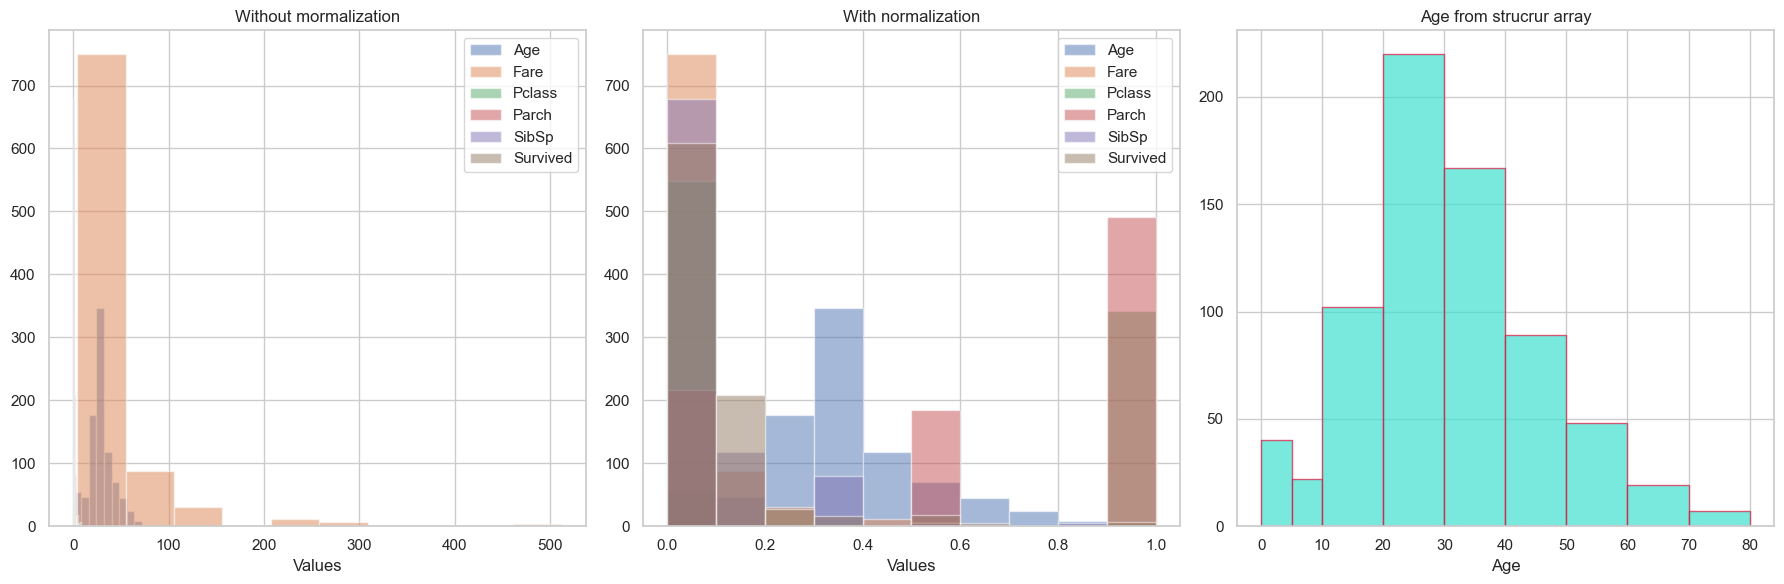

In [490]:
df_n_n = normalize_n()

### Standardize Data in a Pandas

 Z-Score will tell us how many standard deviations away a value is from the mean. when we standardize the data the data will be changed into a specific form where the graph of its frequency will form a bell curve. The formula to convert the data is,

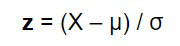
+ df[‘column’] =( df[‘column’] – df[‘column’].mean() ) / df[‘column’].std()



In [323]:
def standardize():
    columns = ["Age", "Fare"]
    df_1 = df[["Age", "Fare",]].copy()
    df_2_1 = df[["Age", "Fare"]].copy()
    
    for column in columns: 
        df_2_1[column] = (df_2_1[column] - df_2_1[column].mean()) / df_2_1[column].std()   

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))


    df_1.plot(kind="hist", bins=20, alpha=0.5, ax=axs[0], legend=True)
    axs[0].legend(["Age", "Fare"], fontsize=10)
    axs[0].grid(axis="y", linestyle="--")

    df_2_1.plot(kind="hist", bins=20, alpha=0.5, ax=axs[1], legend=True)
    axs[1].legend(["Age", "Fare"], fontsize=10)
    axs[1].grid(axis="y", linestyle="--")

    print(df_2_1.mean())
    print(df_2_1.std())
    
    plt.tight_layout()

    plt.show()
    return df_2_1



Age     2.193033e-16
Fare    2.193033e-17
dtype: float64
Age     1.0
Fare    1.0
dtype: float64


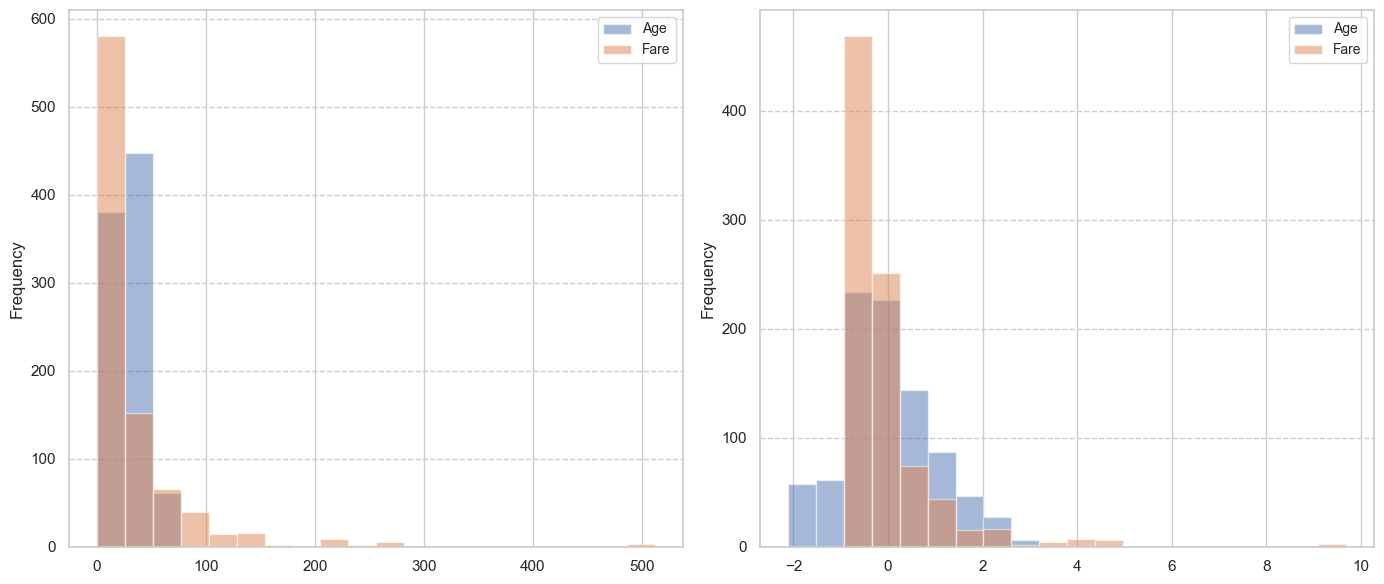

,Age,Fare
PassengerId,,
1,-0.555738,-0.514930
2,0.595147,0.778300
3,-0.268017,-0.501297
4,0.379356,0.411066
5,0.379356,-0.498773
...,...,...
887,-0.196086,-0.398802
888,-0.771528,-0.055466
889,-0.519772,-0.187751


In [324]:
standardize()

### Standardize Data Structed Array

In [510]:
def standardize_n():
    columns = ["Age", "Fare"]
    df_1 = df_f[columns].copy()
    df_2_1 = df_f[columns].copy()
    
    for column in columns:
        df_2_1[column] = (df_f[column] - df_f[column].mean()) / df_f[column].std()
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    

    axs[0].hist([df_1[["Age","Fare"]]], bins=20, alpha=0.5, label=columns)
    axs[0].grid(axis="y", linestyle="--")
    axs[0].set_title("Original Data")

    axs[1].hist([df_2_1["Age"], df_2_1["Fare"]], bins=20, alpha=0.5, label=columns)
    axs[1].grid(axis="y", linestyle="--")
    axs[1].set_title("Standardized Data")

    print("Mean of standardized data:")
    print({column: np.mean(df_2_1[column]) for column in columns})
    print("Std of standardized data:")
    print({column: np.std(df_2_1[column]) for column in columns})

    plt.tight_layout()
    plt.show()
    
    return df_2_1


ValueError: x must have 2 or fewer dimensions

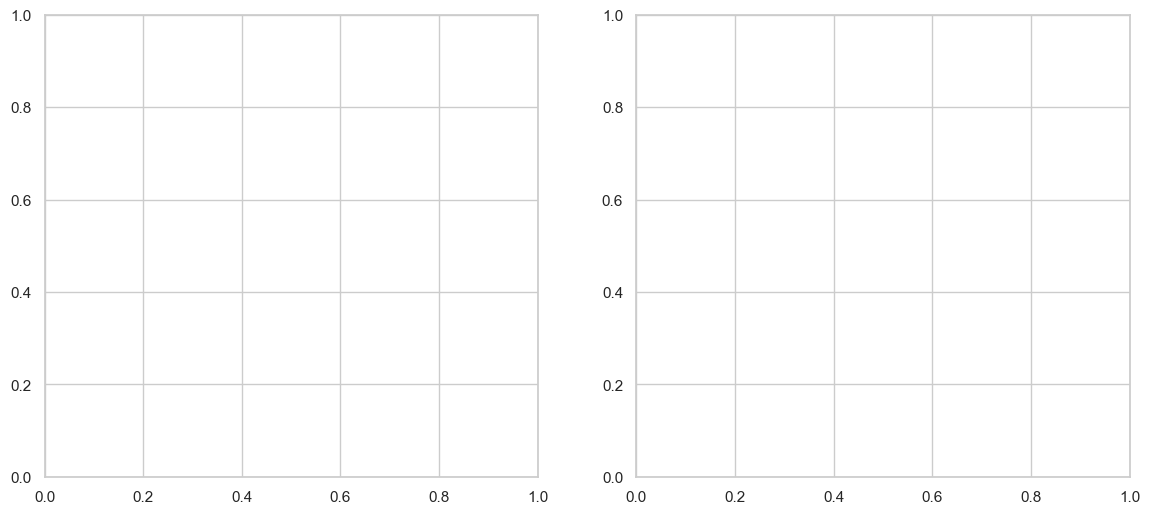

In [511]:
standardize_n()

## Task 4

### Plot the dependency of one integer/real attribute on another.

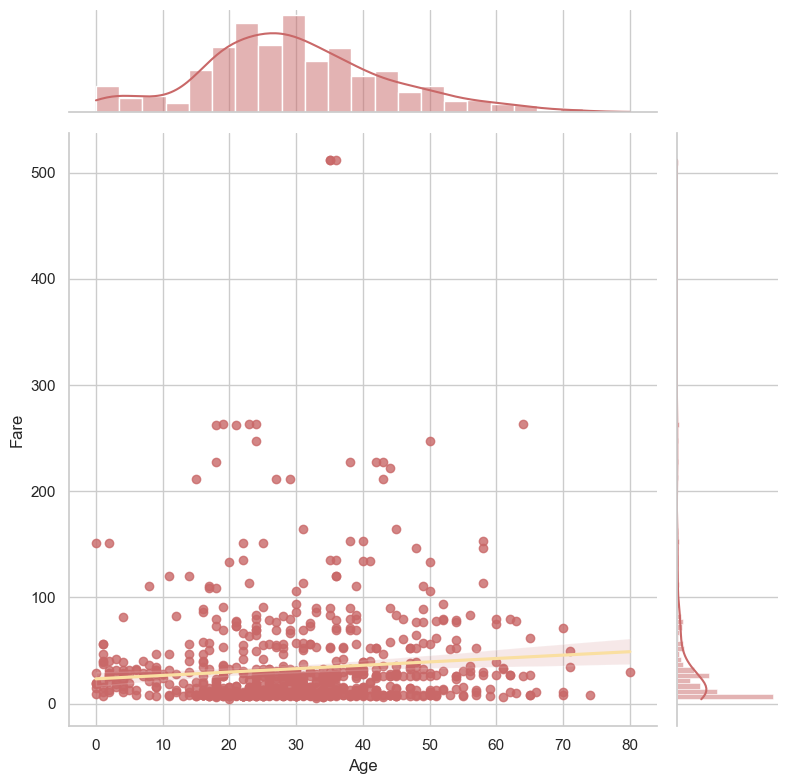

In [336]:
df['Age'] = df['Age'].astype(int)

points = (201/255, 104/255, 104/255)  
line = (250/255, 223/255, 161/255) 

fig = sns.jointplot(x="Age", y="Fare", data=df, kind="reg", height=8, color=points)
 
fig.ax_joint.lines[0].set_color(line)

plt.show()

## Task 5

#### Calculate the Pearson and Spearman coefficient for two integer/real attributes.

In other words, if two variables have a high positive correlation, it means that when one variable increases, the other variable also tends to increase. On the other hand, if they have a high negative correlation, it means that when one variable increases, the other variable tends to decrease.

In [368]:
def pearson(one, two):
    r, p_value = pearsonr(one, two)
    print(f"Pearson correlation coefficient for {one.name} & {two.name}:", r)
    return r

def spearman(one, two):
    r, p_value = spearmanr(one, two)
    print(f"spearman correlation coefficient for {one.name} & {two.name}:", r)
    return r

result = [ ("Fare", "Pclass"), ("Fare", "Age"), ("Pclass", "Age"), ("SibSp", "Parch"), ("Fare", "Survived") ]
results = []

for i in result:
    # print(i[1])

    results.append({
        'One': i[0],
        'Two': i[1],
        'Pearson correlation': pearson(df_f[i[0]], df_f[i[1]]),
        'Spearman correlation': spearman(df_f[i[0]], df_f[i[1]])
    })

df_f_2 = pd.DataFrame(results)

# print(df_f_2.to_string(index=False, float_format="%.4f"))

def color(val):
    color = "red" if val < 0 else "green"
    return f"color: {color}"

r = df_f_2.style.applymap(color, subset=['Pearson correlation', 'Spearman correlation'])

r

Pearson correlation coefficient for Fare & Pclass: -0.5564085801147669
spearman correlation coefficient for Fare & Pclass: -0.7243312987253424
Pearson correlation coefficient for Fare & Age: 0.08900367537352596
spearman correlation coefficient for Fare & Age: 0.09875104949292314
Pearson correlation coefficient for Pclass & Age: -0.3049338981706478
spearman correlation coefficient for Pclass & Age: -0.2817591123385519
Pearson correlation coefficient for SibSp & Parch: 0.41483769862015607
spearman correlation coefficient for SibSp & Parch: 0.4500139710086164
Pearson correlation coefficient for Fare & Survived: 0.25109235751612513
spearman correlation coefficient for Fare & Survived: 0.30076117189393964


/var/folders/7y/jzj3rvbx3875_q5lqczlj3x00000gn/T/ipykernel_30787/2533216044.py:32: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  r = df_f_2.style.applymap(color, subset=['Pearson correlation', 'Spearman correlation'])


,One,Two,Pearson correlation,Spearman correlation
0,Fare,Pclass,-0.556409,-0.724331
1,Fare,Age,0.089004,0.098751
2,Pclass,Age,-0.304934,-0.281759
3,SibSp,Parch,0.414838,0.450014
4,Fare,Survived,0.251092,0.300761


In [343]:
pearson(df_f["Fare"], df_f["Pclass"])
pearson(df_f["Fare"], df_f["Age"])
pearson(df_f["Pclass"], df_f["Age"])
pearson(df_f["SibSp"], df_f["Parch"])
pearson(df_f["Age"], df_f["Parch"])
pearson(df_f["Age"], df_f["Survived"])
pearson(df_f["Fare"], df_f["Survived"])

spearman(df_f["Fare"], df_f["Pclass"])
spearman(df_f["Fare"], df_f["Age"])
spearman(df_f["Pclass"], df_f["Age"])
spearman(df_f["Pclass"], df_f["Age"])
spearman(df_f["SibSp"], df_f["Parch"])
spearman(df_f["Age"], df_f["Parch"])
spearman(df_f["Age"], df_f["Survived"])
spearman(df_f["Fare"], df_f["Survived"])

Pearson correlation coefficient for Fare & Pclass: -0.5564085801147669
Pearson correlation coefficient for Fare & Age: 0.08900367537352596
Pearson correlation coefficient for Pclass & Age: -0.3049338981706478
Pearson correlation coefficient for Pclass & Age: -0.3049338981706478
Pearson correlation coefficient for SibSp & Parch: 0.41483769862015607
Pearson correlation coefficient for Age & Parch: -0.1700125842823988
Pearson correlation coefficient for Age & Survived: -0.06216396128533301
Pearson correlation coefficient for Fare & Survived: 0.25109235751612513
spearman correlation coefficient for Fare & Pclass: -0.7243312987253424
spearman correlation coefficient for Fare & Age: 0.09875104949292314
spearman correlation coefficient for Pclass & Age: -0.2817591123385519
spearman correlation coefficient for Pclass & Age: -0.2817591123385519
spearman correlation coefficient for SibSp & Parch: 0.4500139710086164
spearman correlation coefficient for Age & Parch: -0.21794051386094673
spearman c

## Task 6

#### Conduct One Hot Encoding of the categorical string attribute.

In [362]:
def enc(one):
    print(pd.get_dummies(df, columns=[one], prefix=one))

In [363]:
enc("Sex")

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name  Age  SibSp  \
PassengerId                                                                  
1                                      Braund, Mr. Owen Harris   22      1   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1   
3                                       Heikkinen, Miss. Laina   26      0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)   35      1   
5                                     Allen, Mr. William Henry   35      0   
...                     

## Task 7

#### Visualize multidimensional data using the examples given in the medium

**X_train** - This includes your all independent variables,these will be used to train the model

**X_test** - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

**y_train** - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

*y_test* - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

In [328]:

# df_f = df[['Age', 'SibSp', 'Parch', 'Sex', 'Fare']]

# df_f = pd.get_dummies(df_f, columns=['Sex'], drop_first=True)

# df_1_known = df_f[df_f['Age'].notna()]
# df_2_unknown = df_f[df_f['Age'].isna()]

# X = df_1_known.drop('Age', axis=1)  
# y = df_1_known['Age']    


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_val_pred = model.predict(X_val)

# mse = mean_squared_error(y_val, y_val_pred)
# print(f'MSE: {mse}')

# score = model.score(X_val, y_val)
# print(f'R² на валидационных данных: {score:.2f}')

# X_test = df_2_unknown.drop('Age', axis=1)
# predicted_ages = model.predict(X_test)


# y_val_pred = model.predict(X_val)
# plt.figure(figsize=(8, 6))
# plt.scatter(y_val, y_val_pred, alpha=0.7, color='blue', label='Predictions')

# min_y = min(y_val)
# max_y = max(y_val)
# plt.plot([min_y, max_y], [min_y, max_y], color='grey', ls='--')
# plt.xlabel('Age from dataset', fontsize=14)
# plt.ylabel('Predictions', fontsize=14)

# plt.grid(True)
# plt.show()